<a href="https://colab.research.google.com/github/stnelson58/Sweet-berries-cooking-school/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
adult = fetch_openml(name = "adult" , version = 2,parser= "auto")
X = adult.data
y = adult.target
#X.info()
#X.isna().sum()
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

X_train_num = X_train.select_dtypes("int64")
X_test_num = X_test.select_dtypes("int64")
X_test_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12211 entries, 36030 to 13633
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             12211 non-null  int64
 1   fnlwgt          12211 non-null  int64
 2   education-num   12211 non-null  int64
 3   capital-gain    12211 non-null  int64
 4   capital-loss    12211 non-null  int64
 5   hours-per-week  12211 non-null  int64
dtypes: int64(6)
memory usage: 667.8 KB


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train_num,y_train)
#tree.score(X_train_num , y_train)
#tree.score(X_test_num , y_test)

DecisionTreeClassifier()

In [ ]:
y_train_pred = tree.predict(X_train_num)
y_test_pred = tree.predict(X_test_num)

accuracy_test = accuracy_score(y_test_pred,y_test)

accuracy_train = accuracy_score(y_train_pred,y_train)

accuracy_test

0.779624928343297

None


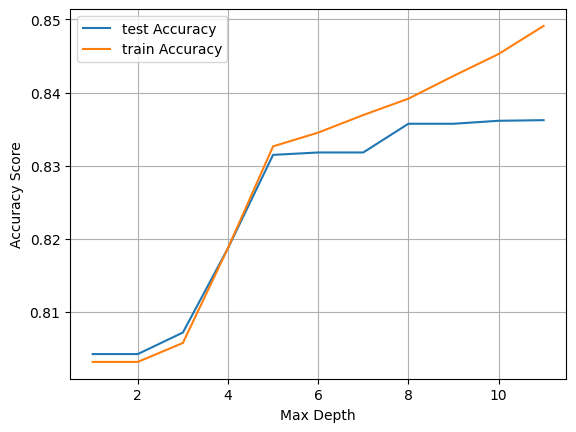

<Figure size 640x480 with 0 Axes>

In [ ]:
print(tree.max_depth)

max_depth_list = np.arange(1,12)
test_accuracy = []
train_accuracy = []

for max in max_depth_list:
  tree = DecisionTreeClassifier(max_depth= max)
  tree.fit(X_train_num,y_train)
  y_train_pred = tree.predict(X_train_num)
  accuracy_train = accuracy_score(y_train_pred,y_train)
  train_accuracy.append(accuracy_train)

  y_test_pred = tree.predict(X_test_num)
  accuracy_test = accuracy_score(y_test_pred,y_test)
  test_accuracy.append(accuracy_test)


plt.plot(max_depth_list,test_accuracy,label = "test Accuracy")

plt.plot(max_depth_list,train_accuracy,label = "train Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid(True)
plt.pause(0.001)
plt.clf()
#plt.cla()
#plt.close()



In [ ]:
# Specify the metrics you want to evaluate (e.g., accuracy)

max_depth_value = np.arange(1,10)
train_Accuracy = []
test_Accuracy = []

for max in max_depth_value:
  tree = DecisionTreeClassifier(max_depth = max)

  cv_results = cross_validate(tree,X_train_num,y_train,cv = 3,scoring= ["accuracy"], return_train_score = True)

  train_Accuracy.append(np.mean(cv_results['train_accuracy']))

  test_Accuracy.append(np.mean(cv_results['test_accuracy']))

plt.plot(max_depth_value,test_Accuracy,label = "test_Accuracy")

plt.plot(max_depth_value,train_Accuracy,label = "train_Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid(True)




